In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

### Loading CSV Files from Results folder

In [175]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), '..', '..', 'Results','MPEC'))
print("\t",files_path)
files_name = 'Model_data_DA_'

ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+'.csv')
    print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC
Reading file 1 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_1.csv
Reading file 2 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_2.csv
Reading file 3 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_3.csv
Reading file 4 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_4.csv
Reading file 5 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_5.csv
Reading file 6 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_6.csv
Reading file 7 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_7.csv
Reading file 8 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\Model_data_DA_8.csv
Reading file 9 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Result

In [176]:
data[0]

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,Bus3_price,Bus4_price,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6
0,0,0.132027,0.000000,0.132027,0.000000,1.200000e-02,0.000000,0.000000,0.005768,0.035159,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.016574,-0.020672,-0.013960,-0.016245,-0.022665
1,0,0.129183,0.000000,0.129183,0.000000,5.600000e-02,0.000000,0.000000,0.000000,0.061350,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.009481,-0.012443,-0.004702,-0.005738,-0.013883
2,0,1.235183,0.000000,1.235183,0.000000,2.039149e-01,0.000000,0.000000,0.005768,0.078352,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.134900,-0.166789,-0.121436,-0.136475,-0.182303
3,0,1.756381,0.000000,1.756381,0.000000,2.252766e-01,0.000000,0.000000,0.052309,0.081093,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.197860,-0.244905,-0.176659,-0.196548,-0.267793
4,0,1.622066,0.000000,1.622066,0.000000,2.684255e-01,0.000000,0.000000,0.062515,0.080402,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.178080,-0.220590,-0.158106,-0.175978,-0.241271
5,0,1.632974,0.000000,1.632974,0.000000,4.159149e-01,0.000000,0.000000,0.039801,0.078960,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.175522,-0.217676,-0.154484,-0.171584,-0.238183
6,0,3.335485,0.000000,3.335485,0.000000,8.897545e-02,0.000000,0.000095,0.096206,0.078890,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.359678,-0.446516,-0.314129,-0.351074,-0.488761
7,0,0.943999,0.000000,0.943999,0.000000,2.534468e-01,0.000000,0.002342,0.000000,0.065997,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.109620,-0.135676,-0.097918,-0.109326,-0.148352
8,0,0.560349,0.000000,0.560349,0.000000,2.197447e-01,0.000000,0.000000,0.000000,0.040690,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.065837,-0.081283,-0.059890,-0.066979,-0.088797
9,0,0.042000,0.000000,0.042000,0.000000,0.000000e+00,0.000000,0.026869,0.000000,0.015131,...,15.000000,15.000000,15.000000,15.000000,0.0,-0.001357,-0.002295,0.002060,0.000699,-0.002750


### Dropping iteration zero [0] 
The first iteration is only for warmup as DAs prediction/forecast for rivals

In [185]:
for df in data:
    df.drop(df[df.Iteration==0].index, inplace=True)
    #df.reset_index(level='index' , inplace=True)

In [186]:
# Dictionary for DAs categories
categories = dict()
for i in range(1,ncda+1):
    if i%2==0:
        categories['DA'+str(i)] = "CAT_01"
    elif i%3==0:
        categories['DA'+str(i)] = "CAT_02"
    else:
        categories['DA'+str(i)] = "CAT_03"

In [187]:
EVs_charge=[]
EVs_discharge=[]
load =[]
generation =[]
bus_price = []
time = [x for x in range(16,40)]
iter_time =[]
cat = []
DA  = []

In [188]:
for i in range(ncda):
    df=data[i]
    EVs_charge.extend(df['EVs_Charge'])
    EVs_discharge.extend(df['EVs_Discharge'])
    load.extend(df['DAs_load\nE_DAs_L'])
    generation.extend(df['DAs_generation\nE_DAs_G'])
    for b in range(1,7):
        if len(bus_price)==6:
            temp = bus_price[b-1]
            temp.extend(df['Bus'+str(b)+'_price'])
            bus_price[b-1] = temp
        else:
            temp =  df['Bus'+str(b)+'_price'].tolist()
            bus_price.append(temp)
    cat.extend([categories['DA'+str(i+1)]]*24)
    DA.extend(["DA"+str(i+1)]*24)
    if i > 0:
        time.extend([x for x in range(16,40)])
    else:
        time = [x for x in range(16,40)]

In [189]:
temp = {'EVs_charge':EVs_charge,
                  'EVs_discharge':EVs_discharge,
                  'load':load,
                  'generation':generation,
                  'time':time,
       'category':cat,
       'DA':DA}
for b in range(1,7):
    temp['Bus'+str(b)+'_price'] = bus_price[b-1]

df = pd.DataFrame(temp)

In [190]:
for x in range(16,40):
    if x >=24:
        index = df[df['time'] == x].index
        df.loc[index,'time'] = df.time[index]%24
        #print(df.time[index]%24)

In [194]:
# Selected and categorized data
#df.time[[0,1,5]]%10
#df['time']

### Average EVS Charge/Discharge for each category
- Cat_01: 75% evs participatoin, 50% PVs penetration
- Cat_02: 50% evs participatoin, 30% PVs penetration
- Cat_02: 35% evs participatoin, 20% PVs penetration

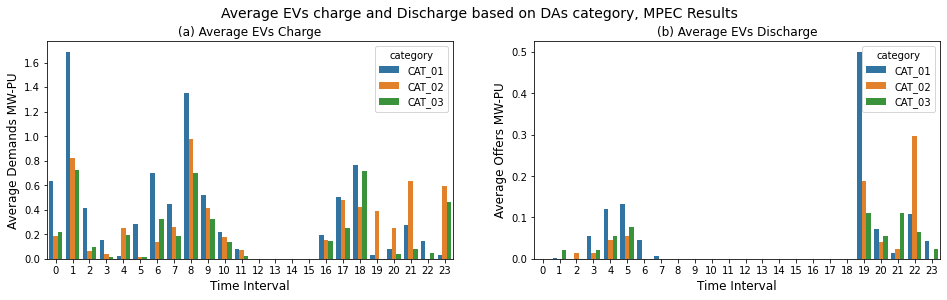

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

#order = ['Mixed', 'Fixed_EVs', 'Fixed_PVs']

sns.barplot(data= df.groupby(['time', 'category']).mean().reset_index(),
            x='time', y='EVs_charge', hue='category', ax=axes[0])

axes[0].set_title("(a) Average EVs Charge", fontsize=12)
axes[0].set_xlabel('Time Interval',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);


sns.barplot(data= df.groupby(['time', 'category']).mean().reset_index(),
            x='time', y='EVs_discharge', hue='category', ax=axes[1])

axes[1].set_title("(b) Average EVs Discharge", fontsize=12)
axes[1].set_xlabel('Time Interval',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);


fig.suptitle('Average EVs charge and Discharge based on DAs category, MPEC Results', fontsize=14, y=1.);

### Average Bus Price based on categories

In [212]:
def drop_non_selection(dataframe, selection):
    temp = df.groupby(['time', 'category']).mean().reset_index()
    drop_list=[]
    for col in temp.columns:
        if col not in selection:
            drop_list.append(col)

    temp.drop(columns= drop_list, inplace=True )
    return temp

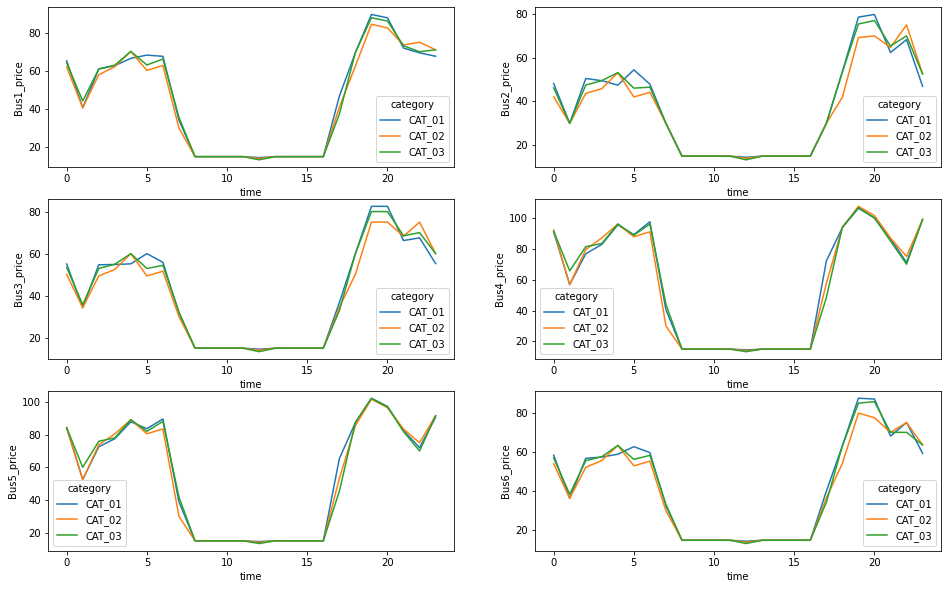

In [228]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

#order = ['Mixed', 'Fixed_EVs', 'Fixed_PVs']
bus_names = ['Bus'+str(i)+'_price' for i in range(1,7)]

row=0
col=0

for i in range(1,7):
    temp = df.groupby(['time', 'category']).mean().reset_index()
    selection = ['time', 'category', bus_names[i-1]]
    temp = drop_non_selection(temp, selection)
    
    col = (i-1)%2
    if i>1 and col==0:
        row=row+1
    
    sns.lineplot(data= df.groupby(['time', 'category']).mean().reset_index(),
            x='time', y=bus_names[i-1], hue='category', ax=axes[row,col])

# axes[0].set_title("(a) Average EVs Charge", fontsize=12)
# axes[0].set_xlabel('Time Interval',fontsize=12);
# axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);


# sns.barplot(data= df.groupby(['time', 'category']).mean().reset_index(),
#             x='time', y='EVs_discharge', hue='category', ax=axes[1])

# axes[1].set_title("(b) Average EVs Discharge", fontsize=12)
# axes[1].set_xlabel('Time Interval',fontsize=12);
# axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);


# fig.suptitle('Average EVs charge and Discharge based on DAs category, MPEC Results', fontsize=14, y=1.);

In [210]:
temp = df.groupby(['time', 'category']).mean().reset_index()
select = ['time', 'category', 'Bus1_price']
drop_list=[]
for col in temp.columns:
    if col not in select:
        drop_list.append(col)

temp.drop(columns= drop_list, inplace=True )

In [221]:
row=0
col=0
for i in range(1,7):
    col = (i-1)%3
    if i>1 and col==0:
        row=row+1
    print(row,col)

0 0
0 1
0 2
1 0
1 1
1 2
